# Actividad - Ecuaciones diferenciales

Armando Borregui 09/11/23

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [7]:
import numpy as np 
from scipy.integrate import solve_ivp, odeint



In [11]:
solve_ivp?


In [12]:
def f(t, x):
    return x/(t+1)
t_span = [0, 20]
x0 = np.array([.5])

x = solve_ivp(f,t_span, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.110e+01  2.000e+01]
        y: [[ 5.000e-01  5.500e-01  1.050e+00  6.052e+00  1.050e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

Grafique con condición inicial $x_0 = 2$

In [13]:
x0 = np.array([2])
x = solve_ivp(f,t_span, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.110e+01  2.000e+01]
        y: [[ 2.000e+00  2.200e+00  4.200e+00  2.420e+01  4.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

In [18]:
x.t

array([ 0.        ,  0.10001   ,  1.10010998, 11.10110978, 20.        ])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


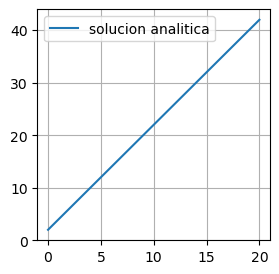

In [23]:
plt.figure(figsize=(3, 3))
plt.plot(x.t, x.y[0,:], label = "solucion analitica")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [35]:
def fun(t, X) :
    # t es un escalar
    # X es un arreglo que contiene x y dx
    x = X[0]
    dx = X[1]
    
    d2x = -w0**2*x
    
    return np.array([dx, d2x])
w0 = 3

tspan =[0, 20]
x0 = np.array([.5, .1])


In [36]:
x = solve_ivp(fun,tspan, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.155e-02 ...  1.989e+01  2.000e+01]
        y: [[ 5.000e-01  5.009e-01 ... -4.999e-01 -4.838e-01]
            [ 1.000e-01 -4.222e-02 ... -8.901e-02  3.879e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 386
     njev: 0
      nlu: 0

Grafique

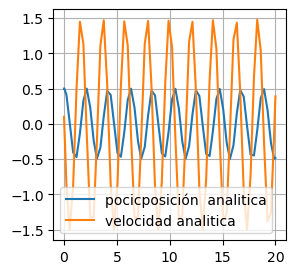

In [56]:
plt.figure(figsize=(3, 3))
plt.plot(x.t, x.y[0,:], label = "pocicposición  analitica")
plt.plot(x.t, x.y[1,:], label = "velocidad analitica")
plt.legend(loc="best")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [54]:
import numpy as np 

import matplotlib.pyplot as plt

def posicion (t,w0,th0,v0):
    A=x0
    B=v0/w0
    return A*np.cos(w0*t)+B*np.sin(w0*t)

def velocidad (t,w0,th0,v0):
    A=x0
    B=v0/w0
    return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))
w0= 3
x0=0.5
v0=0.1
t= np.linspace(0,10,1000)
po=posicion(t,w0,x0,v0)
v=velocidad(t,w0,x0,v0)


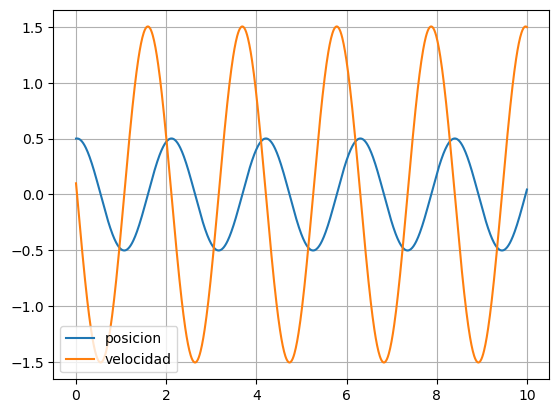

In [55]:

plt.figure()
plt.plot(t,po,label="posicion")
plt.plot(t,v,label="velocidad")
plt.legend(loc="best")
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.